# Supervised Learning (지도학습)

## Regression

- 이런 수식(Y = X + 100)을 가지고 regression을 한거임
- target variable(Y) / input variable(X)
- 최적의 선을 찾아야 함! >> 어떻게? 오차를 줄여나가자!
- 어떨때 오차 측정 방법.. 뭘 쓰는게 좋을까? MSE와 MAE 차이.. MSE가 더 큰 오차를 더 민감하게 받아들임!(더 민감하게 반응, sensitive하게 반응한다) 이런걸 생각하면 접근하고 활용하는게 중요!(식.. 일단 그냥 오차함수는 '2차함수'다. 여기까지 기억하기!)

Gradient Descent
- 오차가 최소인 곳 > 기울기가 0인 꼭지점!!
- 오차가 적어지는 방향으로 간다고 했는데 그 방향을 '기울기가 작아지는 방향'이라과 생각하면 됨! >> `기울기가 작아지는 방향으로 오차를 줄여나가는게 gradient descent!`
- `learning rate` : 기울기를 갈건데 그 다음 step으로 얼마나 갈거냐(step, 보폭이라고 생각하면 됨! 오차를 줄여나가는 보폭!) >> lr이 클수록(step이 크니까) 더 빠르게 내려갈 수 있지만, 우리가 원하는 minimum한 값을 못 찾을수도 있고 튀어버릴수도 있다(발산? 이라 하나? 용어 물어보기!) / 너무 작으면 너무 오래걸림 >> `0.01`로 많이 함!!!!
- Y = aX + b (a=기울기, b=y절편, X=input variable, Y=target variable)
- iterations = 몇번이나 돌릴거냐.. 
- cost_list : x축이 iterations / y축이 오차
- 오차함수(코드 한두줄이 다해줌.!!! 라이브러리.. 잘 써라!)

In [ ]:
# 머신러닝 한다 = 사이킷런한다!(이 라이브러리 기억하기!)

In [2]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ------------------- -------------------- 4.0/8.4 MB 85.6 MB/s eta 0:00:01
     ---------------------------------------  8.4/8.4 MB 105.6 MB/s eta 0:00:01
     ---------------------------------------- 8.4/8.4 MB 88.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/298.0 kB ? eta -:--:--
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00


In [3]:
from sklearn.datasets import load_boston
import pandas as pd # 데이터를 다루기 위해 필요
from sklearn.model_selection import train_test_split # 모델을 만들기 위해서는 train, test data필요. 이걸 나눠줌
from sklearn.linear_model import LinearRegression # 우리가 활용할 모델 객체를 정의
from sklearn.metrics import mean_squared_error # 오차 , error 계산하는 방식

# ethical problem(차별..) 이 문제로 못쓰게 됨!

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [1]:

import pandas as pd # 데이터를 다루기 위해 필요
from sklearn.model_selection import train_test_split # 모델을 만들기 위해서는 train, test data필요. 이걸 나눠줌
from sklearn.linear_model import LinearRegression # 우리가 활용할 모델 객체를 정의
from sklearn.metrics import mean_squared_error # 오차 , error 계산하는 방식

# ethical problem(차별..) 이 문제로 못쓰게 됨!

In [10]:
df = pd.read_csv('load_boston.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

# df = pd.read_csv('./load_boston.csv', index_col = 0) >>> 이렇게 해도 됨

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 여러 정보를 통해서 '주택가격(MEDV)'을 예측해보자!

In [27]:
# step 1 : input variable / target variable 나누기
# x : input varible / y : target variable
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [28]:
# step 2 : train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1004) # test_size = 0.5 하고 오차 비교하기

# 8:2로 split / 1004로 random을 맞추겠다(결과 같게 나옴)
# 파이썬은 unpacking 가능! 그래서 위와 같이 해줌!

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [30]:
# step 3 : model train
# 학습할 때 활용할 모델을 정의해줘야 함! 모델 객체 선언!(모델을 불러옴)
model = LinearRegression() 
model.fit(X_train, y_train) # 학습

LinearRegression()

In [31]:
model.coef_ # 기울기

array([-8.31250759e-02,  5.04950616e-02, -3.96534069e-04,  3.44424430e+00,
       -1.35226625e+01,  3.54788012e+00,  1.25855871e-03, -1.47501679e+00,
        3.12079206e-01, -1.15933807e-02, -9.20011566e-01,  1.13992300e-02,
       -5.88706540e-01])

In [32]:
model.intercept_ # 절편

35.070833731919656

In [35]:
# step 4 : predict
model_prediction = model.predict(X_test) # 모델이 예측한 값

In [36]:
# step 5 : evaluate
mean_squared_error(y_test, model_prediction)

19.450267341373436

- model은 이렇게 만들면 됨.
- 데이터 시각화.. 하는게 step1 전에 빠짐! 데이터 분포 확인하고..이상치 제거 등 분석 과정을 먼저 거쳐야 함!

- test_size 를 더 높게 하면 학습이 덜 되므로 오차 값이 더 클거임(보통 8:2, 7:3으로 학습함!)

## Classification

KNN
- KNN(k-Nearest Neighbors)
- KNN 이웃개수는 무조건 `홀수`!
- 이웃 수가 적을수록 모델의 복잡도는 증가 >> 테스트 정확도는 줄어든다`(오버피팅)`
- 이웃 수가 많아 질수록 모델의 복잡도는 하락 >> 너무 많아지면 너무 단순해서 정확도 하락(훈련 정확도 점점 떨어짐)

과대적합
- 일반화가 어려움
- 모델.. 일반화 할 수 있는지(범용적?!) 측면에서 잘 봐야함

깊이=1
- 질문을 하나라는 의미!
- 깊이가 너무 깊으면 . overfitting... 일반화가 되지x
- 깊이=2, 깊이=9 중에 뭐가 더 좋을까? 정답x (일반화 측면에서는 2번이 더 좋을 수 있고, 정확도 측면에서는 9.. 그 사이 어딘가가 더 좋을 것이다!)
- 깊이가 깊어질수록 오버피팅이 나올 경우가 큼(질문 많으니까.. 트레인데이터에 모델이 너무 학습)

### Iris Data

In [37]:
from sklearn.datasets import load_iris
import pandas as pd

In [38]:
iris_data = load_iris()

In [41]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns = ['class'])

In [45]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
iris_data.target_names # 각각 0,1,2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
y # 꽃 품종

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


- 모델 만들기 전에 데이터가지고 시각화하고, 이상치 있는지 확인하고 처리하고 해줘야 함! 지금은 모델 만드는거에 집중!

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1004)

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
prediction = model.predict(X_test)

In [59]:
model.score(X_train, y_train) # 훈련 정확도 (아래와 비교해서 overfitting인지 아닌지 판단해보기)

1.0

In [53]:
model.score(X_test, y_test) # model의 accuracy > 테스트 정확도

0.9666666666666667

In [54]:
importance = model.feature_importances_
importance

array([0.        , 0.01667014, 0.41134379, 0.57198607])

<BarContainer object of 4 artists>

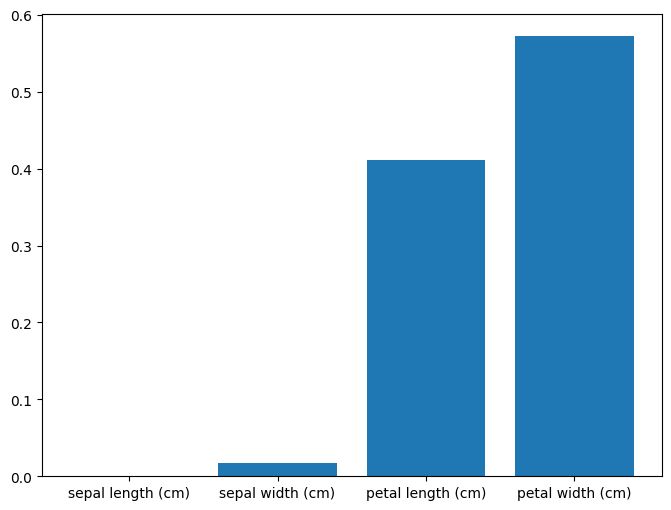

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(X.columns, importance)

# 중요한 변수다 라고 규정지을 수는 없음! 그냥 모델이 학습할 때.. 이 feature를 이만큼 중요하다고 생각, 결과에 영향을 끼쳤구나 정도.. 이 변수가 중요하다! 는 nope!!!
# 왜 이게 중요하게 생각하는지는.. 모름! 블랙박스 영역!!

### Cancer Data
- 유방암 데이터셋

In [ ]:
# 실습
# 모델 생성
# 주요 변수 확인
# 오버피팅 판단

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

cancer_data = load_breast_cancer()

In [2]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
input_data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
target_data = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2, random_state = 1004)

In [152]:
pip install catboost


     ---------------------------------------- 0.0/74.0 MB ? eta -:--:--
     - -------------------------------------- 2.8/74.0 MB 59.7 MB/s eta 0:00:02
     ---- ----------------------------------- 7.7/74.0 MB 82.0 MB/s eta 0:00:01
     ------ ------------------------------- 12.9/74.0 MB 108.8 MB/s eta 0:00:01
     -------- ----------------------------- 16.0/74.0 MB 108.8 MB/s eta 0:00:01
     -------- ------------------------------ 16.8/74.0 MB 65.2 MB/s eta 0:00:01
     ----------- --------------------------- 21.9/74.0 MB 72.6 MB/s eta 0:00:01
     ------------- ------------------------ 27.2/74.0 MB 131.2 MB/s eta 0:00:01
     ---------------- --------------------- 32.6/74.0 MB 129.5 MB/s eta 0:00:01
     ------------------- ------------------ 37.4/74.0 MB 110.0 MB/s eta 0:00:01
     ---------------------- --------------- 43.0/74.0 MB 131.2 MB/s eta 0:00:01
     ------------------------ ------------- 48.2/74.0 MB 131.2 MB/s eta 0:00:01
     --------------------------- ---------- 53.

In [153]:
from catboost import CatBoostClassifier # 이 모델 굉장히.. 좋네..
clf = CatBoostClassifier()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

Learning rate set to 0.00736
0:	learn: 0.6800778	total: 144ms	remaining: 2m 24s
1:	learn: 0.6688352	total: 149ms	remaining: 1m 14s
2:	learn: 0.6569911	total: 154ms	remaining: 51.2s
3:	learn: 0.6458605	total: 159ms	remaining: 39.5s
4:	learn: 0.6322067	total: 162ms	remaining: 32.2s
5:	learn: 0.6223345	total: 166ms	remaining: 27.5s
6:	learn: 0.6092418	total: 170ms	remaining: 24.1s
7:	learn: 0.5983864	total: 173ms	remaining: 21.5s
8:	learn: 0.5863997	total: 176ms	remaining: 19.4s
9:	learn: 0.5762893	total: 178ms	remaining: 17.6s
10:	learn: 0.5670709	total: 180ms	remaining: 16.2s
11:	learn: 0.5565385	total: 182ms	remaining: 15s
12:	learn: 0.5467443	total: 184ms	remaining: 14s
13:	learn: 0.5372026	total: 185ms	remaining: 13.1s
14:	learn: 0.5281973	total: 187ms	remaining: 12.3s
15:	learn: 0.5198509	total: 188ms	remaining: 11.6s
16:	learn: 0.5118114	total: 190ms	remaining: 11s
17:	learn: 0.5026566	total: 191ms	remaining: 10.4s
18:	learn: 0.4939066	total: 192ms	remaining: 9.94s
19:	learn: 0.485

0.9298245614035088

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6) # 나는 아무것도 안했을때.. 규제 안했을 때가 제일 잘 나옴.흠.

In [6]:
model.get_params() # 이걸 활용해서 overfitting 해소해보기! gap줄여보기! > 모델이 사용할 수 있는 파라미터들 모여줌 >> 이 파라미터들로 모델에 규제 주기!!


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [7]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [11]:
prediction = model.predict(X_test)

In [19]:
prediction # 오차검증할때 쓰는거임(predicton=y_test)

,0
0,1
1,1
2,1
3,1
4,0
...,...
109,1
110,1
111,0
112,0


In [14]:
y_test

,class
474,1
172,0
41,0
549,1
337,0
...,...
309,1
455,1
34,0
244,0


In [9]:
model.score(X_train, y_train) # 훈련 정확도 

1.0

In [20]:
model.score(X_test, y_test) # 테스트 정확도 >> 훈련정확도는 높은데 테스트 정확도가 낮음 --> Overfitting!!(갭이 0.01이나 0.02정도 나와야 overfitting이 아니다..라고 할 수 있음)

0.9035087719298246

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

0.09649122807017543

In [ ]:
# importance 상위 5개, 7개만 보고 싶음
# tick 처리 좀.. 하고 싶음..

In [227]:
importance = model.feature_importances_
importance

array([0.        , 0.05092353, 0.        , 0.        , 0.        ,
       0.00801045, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0088115 , 0.00931298, 0.        ,
       0.73920134, 0.0326473 , 0.00567707, 0.        , 0.01384664,
       0.        , 0.01380957, 0.11006961, 0.        , 0.00769003])

<BarContainer object of 30 artists>

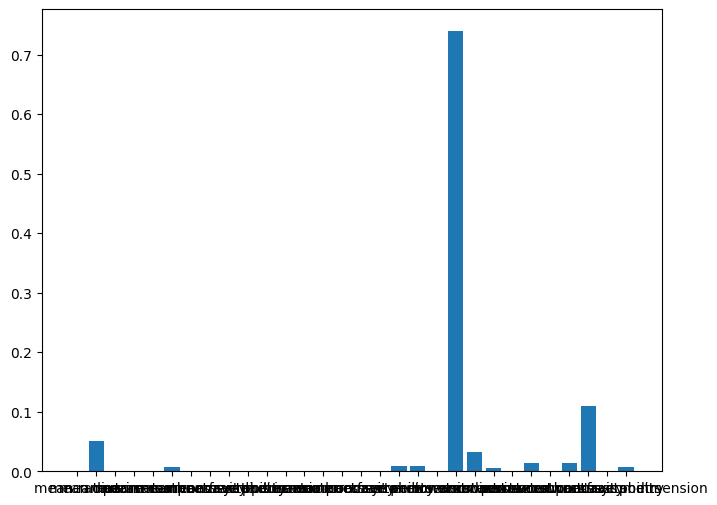

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(input_data.columns, importance)

([<matplotlib.patches.Wedge at 0x29d072ca820>,
 [Text(1.1, 0.0, ''),
  Text(1.0859533413579259, 0.17522939363461898, ''),
  Text(1.0441721083753523, 0.3459835373120686, ''),
  Text(1.0441721083753523, 0.3459835373120686, ''),
  Text(1.0441721083753523, 0.3459835373120686, ''),
  Text(1.0351355305000554, 0.3721484025175563, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0140323279540253, 0.4263079143813078, ''),
  Text(0.9881282265846691, 0.48332453675210507

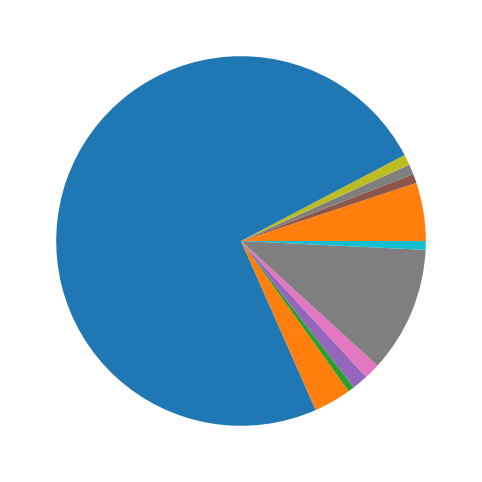

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.pie(importance)

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_2144\3435090659.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


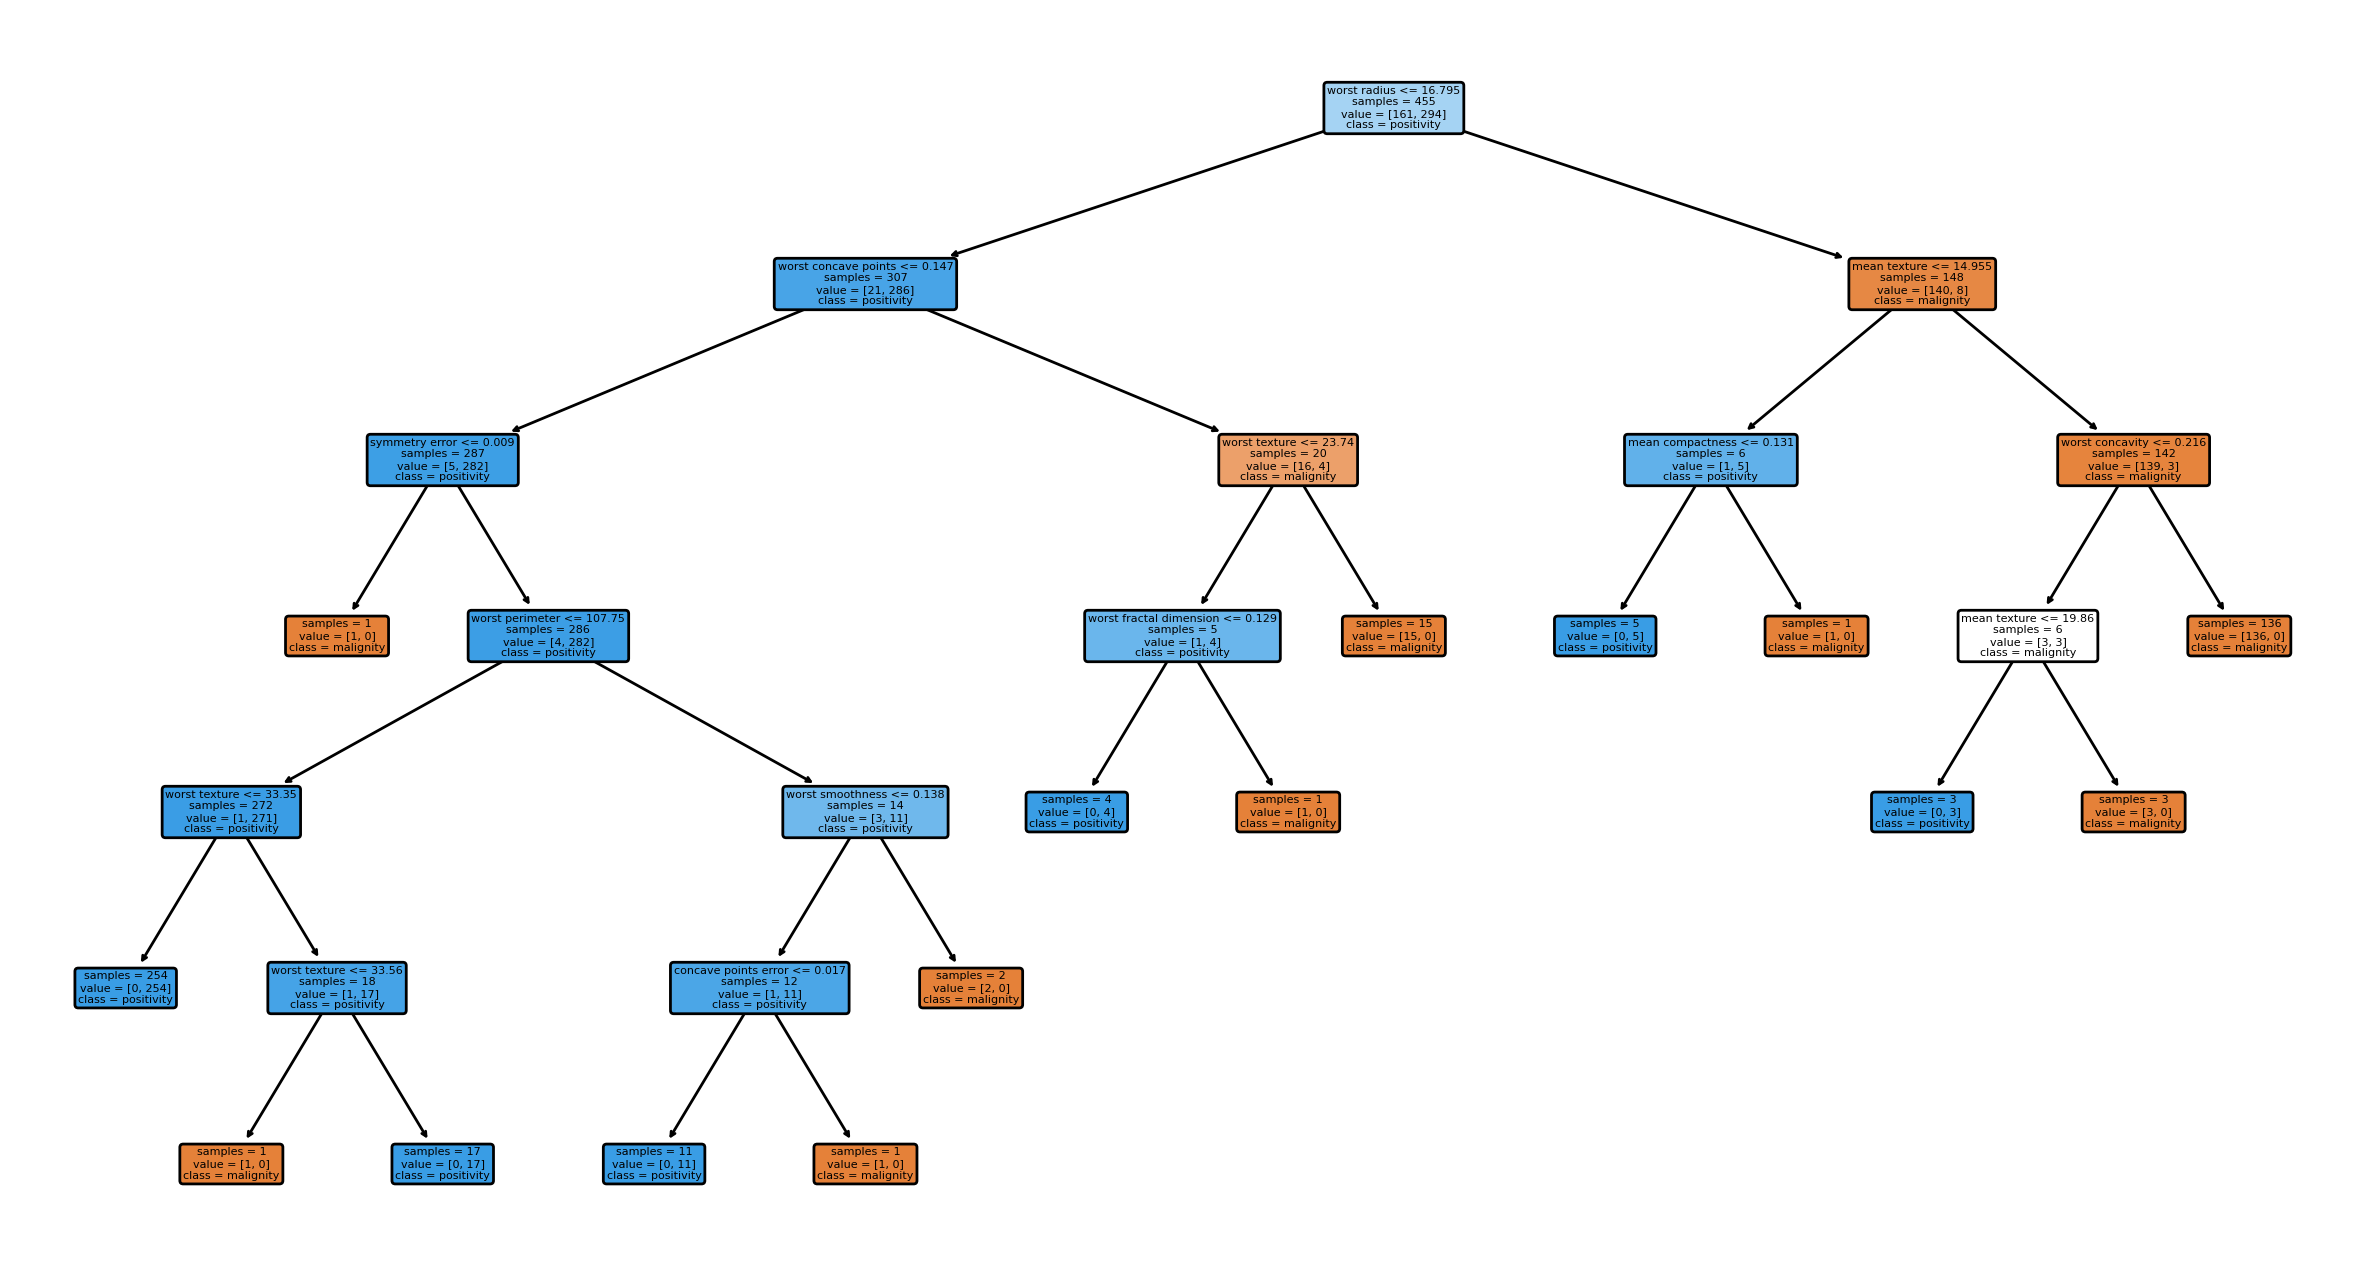

In [230]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model, class_names=["malignity", "positivity"], feature_names=cancer_data.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

## Scaler (스케일 변환)
- 데이터를 전처리하는 느낌
- 왜함? 단위를 맞춰줘야 해! 그래야 비교.. 분석이 가능하니까!
- StandardScaler(표준화) > 평균0, 분산1 / MinMaxScaler(정규화) > 모든 데이터가 0~1 사이에 위치하도록 데이트 변환
- RobustScaler > 중간값과 사분위 값 사용(이상치 영향 덜 받음) / Normalizer > 각도 중요할 때 사용

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1004)

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
# scaler 선언
scaler = MinMaxScaler()
scaler.fit(X_train) # scaler.fit > X_train의 max, min을 활용해 scaler를 만들겠다는 의미

MinMaxScaler()

In [10]:
X_train_scaled = scaler.transform(X_train) # X_train 기준으로 scaler를 만들고(scaler.fit), scaler에다가 X_train 데이터를 transform 해줌
print('스케일 변환 전 모양:', X_train.shape)
print('스케일 변환 후 모양:', X_train_scaled.shape) # size는 바뀌지 않음

print('스케일 변환 전 최소값:\n', X_train.min(axis = 0))
print('스케일 변환 전 최대값:\n', X_train.max(axis = 0))
print('스케일 변환 후 최소값:\n', X_train_scaled.min(axis = 0))
print('스케일 변환 후 최대값:\n', X_train_scaled.max(axis = 0))

스케일 변환 전 모양: (455, 30)
스케일 변환 후 모양: (455, 30)
스케일 변환 전 최소값:
 mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.771400
area error                   7.228000
smoothness error             0.002826
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness           

In [11]:
X_test_scaled = scaler.transform(X_test) # X_train 기준으로 학습했기 때문에 값이 이렇게 나옴! 같은 스케일러 쓰는게 중요!(이게 0,1 사이 아니라고 틀린게 아님!)
print('스케일 변환 후 최소값:\n', X_test_scaled.min(axis = 0))
print('스케일 변환 후 최대값:\n', X_test_scaled.max(axis = 0))

스케일 변환 후 최소값:
 [ 0.07747645  0.0226581   0.07290443  0.03435843  0.1185339   0.01245322
  0.          0.          0.08080808  0.01010952  0.00137606  0.00053736
 -0.00067897 -0.0007963  -0.03932306  0.01846817  0.          0.
  0.0374008   0.01052574  0.05610103  0.09008529  0.04726331  0.02204581
 -0.07349617 -0.00686738  0.          0.          0.02897694  0.02407189]
스케일 변환 후 최대값:
 [0.9578778  0.71051742 0.95577362 0.89353128 0.71923806 0.89571192
 0.96251172 0.9333996  0.81717172 0.90564448 0.42748506 1.27971039
 0.44079289 0.29323404 0.51349633 0.70303722 1.30348914 1.29070905
 0.68100974 1.31777539 0.89612238 0.82009595 0.84859804 0.74488793
 1.03062341 0.73986011 0.93450479 0.92371134 0.82968658 0.56316411]


## 스케일 변환2
- `scaler.fit_transform()`
- fit, transform을 한번에 해보기!
- 같은 스케일러를 써줘야 한다!

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1004)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# scaler 선언
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

print('스케일 변환 전 모양:', X_train.shape)
print('스케일 변환 후 모양:', X_train_scaled.shape) # size는 바뀌지 않음

print('스케일 변환 전 최소값:\n', X_train.min(axis = 0))
print('스케일 변환 전 최대값:\n', X_train.max(axis = 0))
print('스케일 변환 후 최소값:\n', X_train_scaled.min(axis = 0))
print('스케일 변환 후 최대값:\n', X_train_scaled.max(axis = 0))

스케일 변환 전 모양: (455, 30)
스케일 변환 후 모양: (455, 30)
스케일 변환 전 최소값:
 mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.771400
area error                   7.228000
smoothness error             0.002826
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness           

In [31]:
X_test_scaled = scaler.transform(X_test) # 여기서 fit_transform 하면 안됨! scaler가 달라짐!(다른 scaler) >> 같은 scaler를 써야 함!
print('스케일 변환 후 최소값:\n', X_train_scaled.min(axis = 0))
print('스케일 변환 후 최대값:\n', X_train_scaled.max(axis = 0))

스케일 변환 후 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 변환 후 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- 스케일 변환이 모델에 성능 향상에도 영향을 준다! scm?! >> 스케일러 영향을 많이 받는 모델!

- 스케일 변환 후 결과 차이 보기!

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6) 

In [33]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6)

In [34]:
prediction = model.predict(X_test_scaled)

In [35]:
model.score(X_train_scaled, y_train)

1.0

In [36]:
model.score(X_test_scaled, y_test) 

0.9122807017543859

In [ ]:
# 스케일변환 전 train_data 정확도: 1.0
# 스케일변환 전 test_data 정확도: 0.8859649122807017
# 스케일변환 후 train_data 정확도: 1.0
# 스케일변환 후 test_data 정확도: 0.9122807017543859

In [ ]:
# 트리구조 특성상.. 스케일 변환 효과가 많이 안날 수 있음! 그래도 웬만해서는 스케일 변환 해주는게 좋음!!